## EDA

#### Top 10 and Bottom 10 for Metacritic_Score, Recommendations, Count_DLC, Total_Achievements Positive_Reviews, Negative_Reviews, Peak_Players_Yesterday, Total_reviews, Peak_Players_all_Time.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [2]:
df_steam = pd.read_excel('data/steam_data_final.xlsx', index_col=0)

In [3]:
df_steam.columns

Index(['Steam_AppID', 'Minimum_age', 'Free', 'About_the_Game', 'Developers',
       'Publishers', 'Windows_Support', 'Mac_Support', 'Linux_Support',
       'Metacritic_Score', 'Recommendations', 'Release_Date', 'Count_DLC',
       'Total_Achievements', 'Full_Controller_Support', 'DRM_Protection',
       'Discounted_Price', 'Original_Price', 'categories_Description',
       'genres_Description', 'Is_Subscription', 'Positive_Reviews',
       'Negative_Reviews', 'Peak_Players_Yesterday', 'Total_reviews',
       'Peak_Players_all_Time'],
      dtype='object')

In [4]:
# While checking the Data in Excel notices there are some repeated IDs, remove the duplicates
df_steam = df_steam.drop_duplicates(subset='Steam_AppID', keep='first')

In [5]:
df_steam.describe()

,Steam_AppID,Minimum_age,Free,Windows_Support,Mac_Support,Linux_Support,Metacritic_Score,Recommendations,Count_DLC,Total_Achievements,Full_Controller_Support,DRM_Protection,Discounted_Price,Original_Price,Is_Subscription,Positive_Reviews,Negative_Reviews,Peak_Players_Yesterday,Total_reviews,Peak_Players_all_Time
count,1.127700e+04,11277.000000,11277.000000,11277.000000,11277.000000,11277.000000,670.000000,1.127700e+04,11277.000000,11277.000000,11277.000000,11277.000000,11277.000000,11277.000000,11277.000000,1.127700e+04,11277.000000,1.127700e+04,1.127700e+04,8.585000e+03
mean,1.178026e+06,0.297774,0.122550,0.999468,0.209098,0.145251,73.579104,1.949074e+03,0.739115,26.525672,0.209542,0.004966,6.751862,7.025987,0.001153,2.741848e+03,452.769886,2.994372e+02,3.194618e+03,2.006320e+03
std,6.207313e+05,2.193869,0.327935,0.023061,0.406683,0.352370,10.568681,4.370199e+04,17.464560,223.684965,0.406999,0.070297,10.276070,10.586046,0.033935,6.833385e+04,12609.748869,1.321612e+04,7.869575e+04,4.500681e+04
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.835300e+05,0.000000,0.000000,1.000000,0.000000,0.000000,68.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.790000,0.790000,0.000000,1.000000e+00,0.000000,0.000000e+00,2.000000e+00,3.000000e+00
50%,1.090210e+06,0.000000,0.000000,1.000000,0.000000,0.000000,75.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,3.990000,3.990000,0.000000,1.200000e+01,4.000000,0.000000e+00,1.700000e+01,7.000000e+00
75%,1.643470e+06,0.000000,0.000000,1.000000,0.000000,0.000000,81.000000,0.000000e+00,0.000000,20.000000,0.000000,0.000000,9.750000,9.960000,0.000000,8.000000e+01,24.000000,1.000000e+00,1.100000e+02,6.200000e+01
max,2.473690e+06,18.000000,1.000000,1.000000,1.000000,1.000000,96.000000,3.824966e+06,1555.000000,5000.000000,1.000000,1.000000,229.990000,229.990000,1.000000,6.465958e+06,934219.000000,1.255236e+06,7.287448e+06,3.260505e+06


#### Start with correlation analysis

<AxesSubplot: >

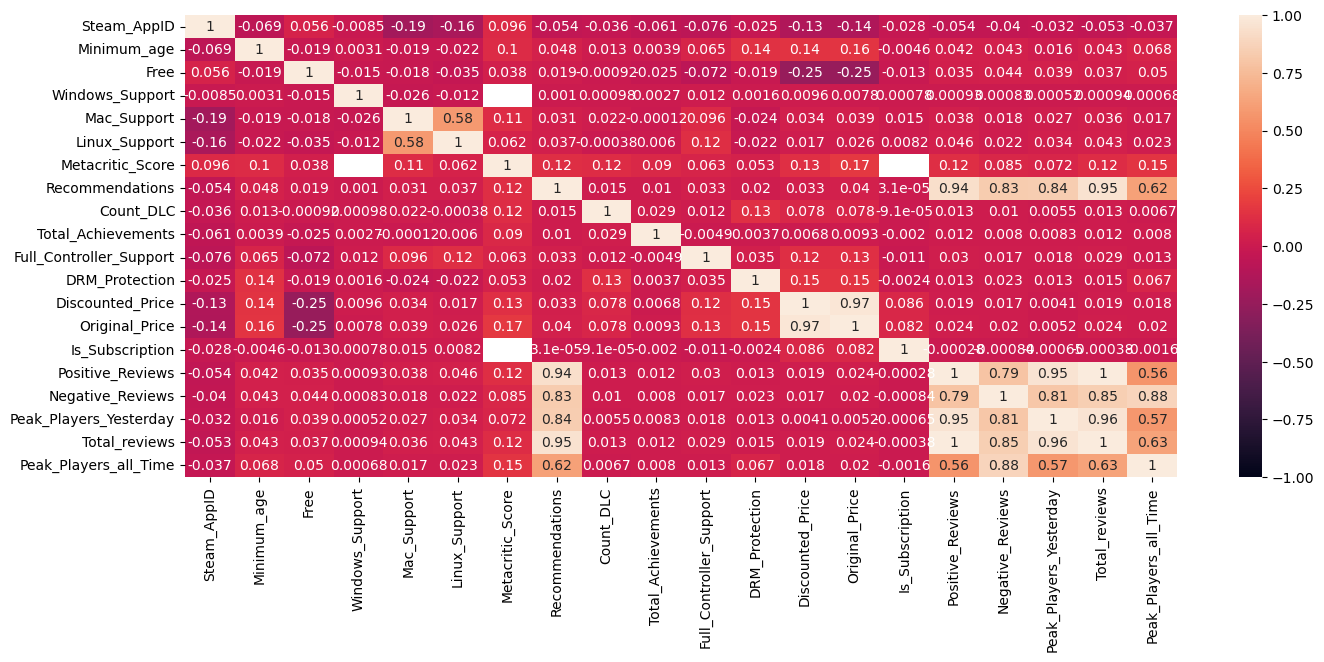

In [6]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
sns.heatmap(df_steam.corr(), vmin=-1, vmax=1, annot=True)

#### From the correlation map:
- Strong positive correlation between the Positive Reviews and the Recommendations
- Strong positive correlation between the Positive Reviews and the Peak Players Yesterday
- Games that support Mac also tend to support Linus and vice-versa. However this is NOT a rule

<br>
There's not any other correlations that can be usefull for this Project analysis

### Let's see what are the titles repeating on the top and bottom 20

In [7]:
# See what are the Top 20 games
top10_metacritic_score = df_steam['Metacritic_Score'].nlargest(20).index
top10_recommendations = df_steam['Recommendations'].nlargest(20).index
top10_positive_reviews = df_steam['Positive_Reviews'].nlargest(20).index
top10_peak_players_yesterday = df_steam['Peak_Players_Yesterday'].nlargest(20).index

# Combine the indices from all four variables into a single DataFrame
top10_games = pd.DataFrame({
    'Metacritic_Score': top10_metacritic_score,
    'Recommendations': top10_recommendations,
    'Positive_Reviews': top10_positive_reviews,
    'Peak_Players_Yesterday': top10_peak_players_yesterday
})

# Find the unique games from the combined top 20 lists
unique_games = top10_games.drop_duplicates()
unique_games

,Metacritic_Score,Recommendations,Positive_Reviews,Peak_Players_Yesterday
0,Half-Life,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive
1,Half-Life 2,PUBG: BATTLEGROUNDS,Dota 2,Dota 2
2,Portal 2,Tom Clancy's Rainbow Six® Siege,PUBG: BATTLEGROUNDS,PUBG: BATTLEGROUNDS
3,Divinity: Original Sin - Enhanced Edition,Garry's Mod,Tom Clancy's Rainbow Six® Siege,Call of Duty®: Modern Warfare® II
4,ELDEN RING,The Witcher 3: Wild Hunt,Garry's Mod,Team Fortress 2
5,The Witcher 3: Wild Hunt,Left 4 Dead 2,Team Fortress 2,EA SPORTS™ FIFA 23
6,Team Fortress 2,ELDEN RING,Left 4 Dead 2,Unturned
7,Dragon Age: Origins - Ultimate Edition,ARK: Survival Evolved,The Witcher 3: Wild Hunt,ARK: Survival Evolved
8,Freespace 2,Fall Guys,ELDEN RING,Tom Clancy's Rainbow Six® Siege
9,Spelunky 2,The Forest,ARK: Survival Evolved,Don't Starve Together


In [8]:
# See what are the bottom 20 games
bottom10_metacritic_score = df_steam['Metacritic_Score'].nsmallest(20).index
bottom10_recommendations = df_steam['Recommendations'].nsmallest(20).index
bottom10_positive_reviews = df_steam['Positive_Reviews'].nsmallest(20).index
bottom10_peak_players_yesterday = df_steam['Peak_Players_Yesterday'].nsmallest(20).index

# Combine the indices from all four variables into a single DataFrame
bottom10_games = pd.DataFrame({
    'Metacritic_Score': bottom10_metacritic_score,
    'Recommendations': bottom10_recommendations,
    'Positive_Reviews': bottom10_positive_reviews,
    'Peak_Players_Yesterday': bottom10_peak_players_yesterday
})

# Find the unique games from the combined bottom 20 lists
unique_games_bottom = bottom10_games.drop_duplicates()

unique_games_bottom

,Metacritic_Score,Recommendations,Positive_Reviews,Peak_Players_Yesterday
0,Wild West Online,Sherlock Holmes: The Mystery of the Mummy,Jagged Alliance 2 Gold,Gumboy Tournament
1,Drug Wars,Pacific Storm,CSX ES44AC Add-on Livery,Space Trader: Merchant Marine
2,Underworld Ascendant,LUMINES™ Advance Pack,CSX SD70MAC Add-on Livery,Pacific Storm
3,Making History II: The War of the World,Culpa Innata,Galactic Command Echo Squad SE,Chains
4,The Chaos Engine,Jack Keane,Down To One Dedicated Server,LUMINES™ Advance Pack
5,Damnation,Jagged Alliance 2 Gold,ProtoMasons,Grand Theft Auto: Episodes from Liberty City
6,Perimeter 2: New Earth,Perimeter 2: New Earth,MasterCook 15,Jagged Alliance 2 Gold
7,Meridian: New World,Ankh 2: Heart of Osiris,Golf Masters,Perimeter 2: New Earth
8,I Can't Escape: Darkness,Ankh 3: Battle of the Gods,Professor Teaches® OneNote 2013 & 365,SlamIt Pinball Big Score
9,Waking,Hunting Unlimited™ 2008,Professor Teaches® Outlook 2013 & 365,Ankh 2: Heart of Osiris


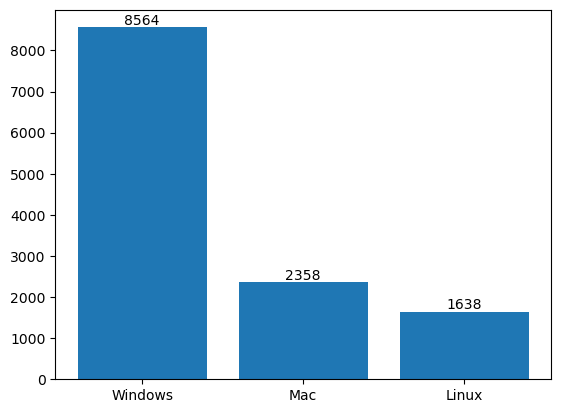

In [9]:
# Count the number of games that only support Windows
only_windows_count = ((df_steam['Windows_Support'] == 1) & (df_steam['Mac_Support'] == 0) & (df_steam['Linux_Support'] == 0)).sum()

# Count the number of games that support Mac
mac_count = (df_steam['Mac_Support'] == 1).sum()

# Count the number of games that support Linux
linux_count = (df_steam['Linux_Support'] == 1).sum()

# Create the bar chart
os_system = ['Windows', 'Mac', 'Linux']
counts = [only_windows_count, mac_count, linux_count]
plt.bar(os_system, counts)

# Add value labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count),ha='center', va='bottom')

plt.show()

#### There's a huge difference between the ammount of games that only support Windows and the other OS's so this is something to consider

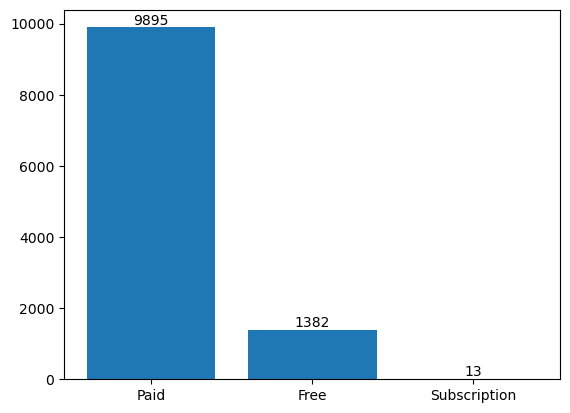

In [10]:
# Count the number of games that are paid, number of free games and the count of subscription games
free_games = (df_steam['Free'] == 1).sum()

paid_games = (df_steam['Free'] == 0).sum()

subscription_games = (df_steam['Is_Subscription'] == 1).sum()

# Create the bar chart
price = ['Paid', 'Free', 'Subscription']
counts = [paid_games,free_games, subscription_games]
plt.bar(price, counts)

# Add value labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count),ha='center', va='bottom')

plt.show()

#### Only approximately 14% of the games on Steam are free and not even 0.15% are a subscription based

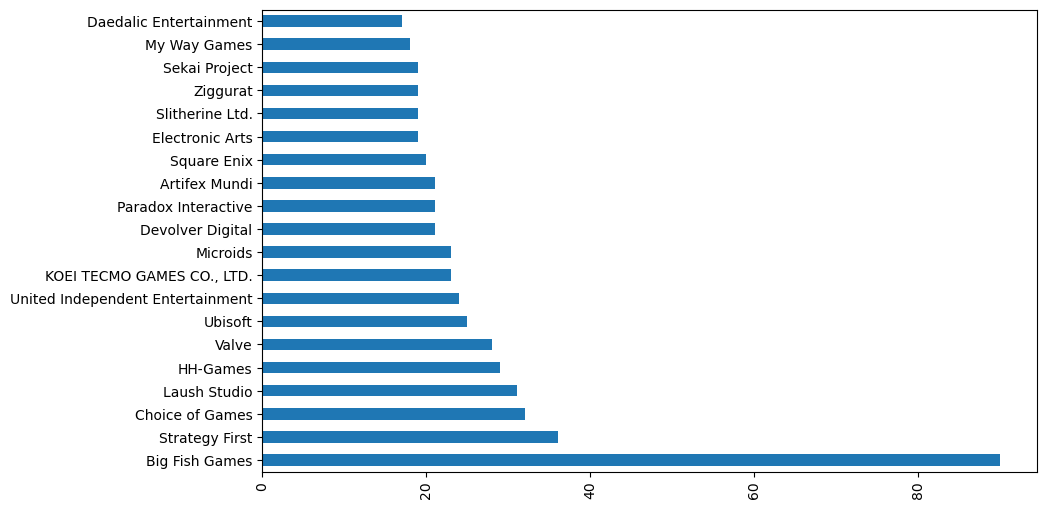

In [11]:
# Count the number of games published by the top 20 publishers
publisher_counts = df_steam['Publishers'].value_counts().head(20)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
publisher_counts.plot(kind='barh', ax=ax)

# Make the labels horizontal
plt.xticks(rotation=90)

plt.show()

#### Big Fish Games is the major publisher on steam, upon further investigation, they produce their own games and do not publish for other Devs as it is with the majority of the top Publishers

#### Check what are the months with more games released

In [12]:
# Convert the realed data to date and group by month
df_steam['Release_Date'] = pd.to_datetime(df_steam['Release_Date'])
df_steam['Month'] = df_steam['Release_Date'].dt.month
monthly_counts = df_steam.groupby('Month').size()

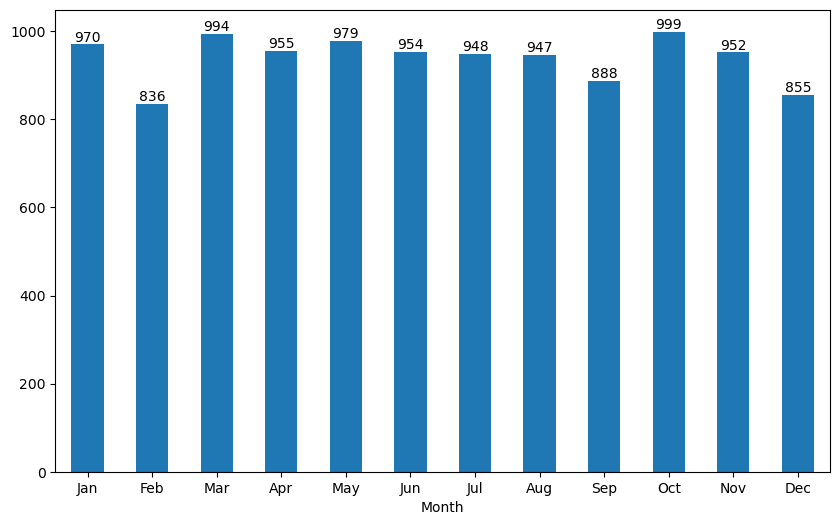

In [13]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
monthly_counts.plot(kind='bar', ax=ax)
# Update the x-axis tick labels
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]  # Get month abbreviations
ax.set_xticklabels(month_labels, rotation=0)  # Rotate x-axis labels by 45 degrees

# Add value labels to the bars
for i, count in enumerate(monthly_counts):
    plt.text(i, count, str(count),ha='center', va='bottom')

plt.show()

#### During February and December, it seems there are fewer games being released, so this can be an opportunity for our developer.

### Now, we will get an overview on the genres of games we have

In [14]:
# Sliple each value separeted by ","
df_steam['Genres'] = df_steam['genres_Description'].str.split(', ')
# Get a row for each value separeted by ","
df_genres = df_steam.explode('Genres')
# Count the occurrences
genre_counts = df_genres['Genres'].value_counts()

# Get the count for each genre
for genre, count in genre_counts.items():
    print(genre, count)

Indie 7681
Action 4704
Casual 4394
Adventure 4370
Simulation 2215
Strategy 2170
RPG 1928
Early Access 1199
Sports 531
Racing 414
Massively Multiplayer 296
Utilities 95
Violent 81
Design & Illustration 71
Education 60
Animation & Modeling 53
Gore 49
Software Training 35
Video Production 34
Game Development 29
Audio Production 23
Photo Editing 18
Nudity 16
Web Publishing 12
Accounting 7
Sexual Content 6
Movie 1
Documentary 1
Episodic 1
Short 1
Tutorial 1
360 Video 1


#### Indies are extremely popular but they are not a genre per se. So let's see what games have other genres that include indie in the genre row

In [27]:
games_with_indie = df_steam[df_steam['genres_Description'].str.contains('Indie', case=False, na=False)]['genres_Description'].value_counts()

for description, count in games_with_indie.items():
    print(description, count)

Action, Indie 669
Casual, Indie 622
Action, Adventure, Indie 564
Adventure, Indie 471
Adventure, Casual, Indie 370
Action, Casual, Indie 369
Indie 340
Action, Adventure, Casual, Indie 213
Casual, Indie, Strategy 210
Adventure, Indie, RPG 170
Action, Adventure, Indie, RPG 167
Casual, Indie, Simulation 152
Indie, Strategy 126
Action, Indie, Early Access 106
Indie, RPG 98
Indie, Simulation, Strategy 95
Indie, Simulation 91
Adventure, Casual, Indie, RPG 78
Action, Indie, RPG 77
Action, Indie, Strategy 74
Casual, Indie, Simulation, Strategy 62
Action, Adventure, Indie, Early Access 61
Action, Casual, Indie, Strategy 60
Adventure, Casual, Indie, Simulation 59
Action, Adventure, Casual, Indie, Simulation 53
Indie, RPG, Strategy 53
Action, Adventure, Indie, Simulation 53
Adventure, Indie, Simulation 53
Action, Adventure, Casual, Indie, RPG 48
Action, Indie, Simulation 44
Action, Casual, Indie, Simulation 44
Action, Adventure, Indie, Strategy 44
Casual, Indie, RPG 42
Adventure, Casual, Indie, S